# Give me some Credit

**Data**

**SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age:** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome:** Monthly income

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
credit_df = pd.read_csv("data/cs-training.csv")
credit_test_df = pd.read_csv("data/cs-test.csv")

In [87]:
credit_test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## Data Exploration

In [88]:
# drop the row id column 
credit_df =credit_df.drop(credit_df.columns[0],axis=1)
credit_test_df =credit_test_df.drop(credit_test_df.columns[0],axis=1)

In [89]:
credit_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [90]:
credit_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [91]:
credit_test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


### Cómo de desbalanceada está la variable de salida: SeriousDlqin2yrs

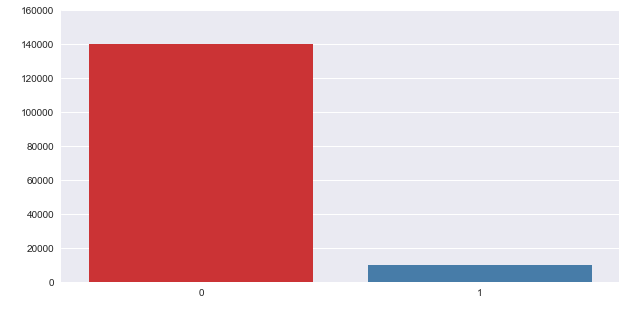

In [92]:
ax = sns.countplot(x = credit_df.SeriousDlqin2yrs ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
plt.show()

### NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate : sustituir Outliers por la media

In [93]:
from collections import Counter
Counter(credit_df['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [94]:
Counter(credit_df['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [95]:
Counter(credit_df['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [96]:
def removeAndPutMedian(data):
    Media = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            Media.append(med)
        else:
            Media.append(val)
            
    return Media

In [97]:
credit_df['NumberOfTime60-89DaysPastDueNotWorse'] = removeAndPutMedian(credit_df['NumberOfTime60-89DaysPastDueNotWorse'])
credit_df['NumberOfTime30-59DaysPastDueNotWorse']=removeAndPutMedian(credit_df['NumberOfTime30-59DaysPastDueNotWorse'])
credit_df['NumberOfTimes90DaysLate']=removeAndPutMedian(credit_df['NumberOfTimes90DaysLate'])

In [98]:
credit_test_df['NumberOfTime60-89DaysPastDueNotWorse'] = removeAndPutMedian(credit_test_df['NumberOfTime60-89DaysPastDueNotWorse'])
credit_test_df['NumberOfTime30-59DaysPastDueNotWorse']=removeAndPutMedian(credit_test_df['NumberOfTime30-59DaysPastDueNotWorse'])
credit_test_df['NumberOfTimes90DaysLate']=removeAndPutMedian(credit_test_df['NumberOfTimes90DaysLate'])

### RevolvingUtilizationOfUnsecuredLines: eliminar Outliers

In [99]:
#desviación tipica muy alta
credit_df['RevolvingUtilizationOfUnsecuredLines'].max()

50708.0

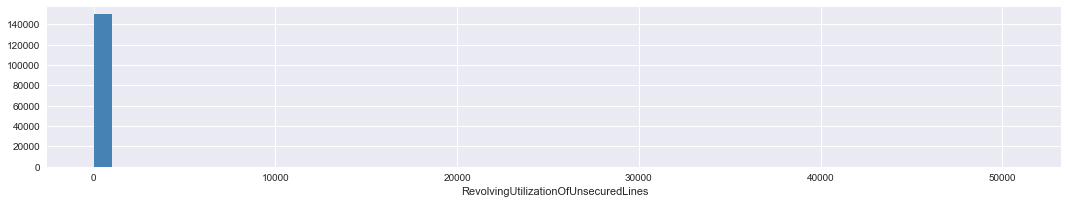

In [100]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "RevolvingUtilizationOfUnsecuredLines", color="steelblue", bins=50, lw=0)
plt.show()

In [101]:
credit_df['RevolvingUtilizationOfUnsecuredLines'][credit_df['RevolvingUtilizationOfUnsecuredLines']>2].count()

371

In [102]:
Revol= []
for val in credit_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 2:
        Revol.append(val)
    else:
        Revol.append(2)
credit_df['RevolvingUtilizationOfUnsecuredLines']=Revol

In [103]:
Revol= []
for val in credit_test_df['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 2:
        Revol.append(val)
    else:
        Revol.append(2)
credit_test_df['RevolvingUtilizationOfUnsecuredLines']=Revol

### age: eliminamos un outlier en 0

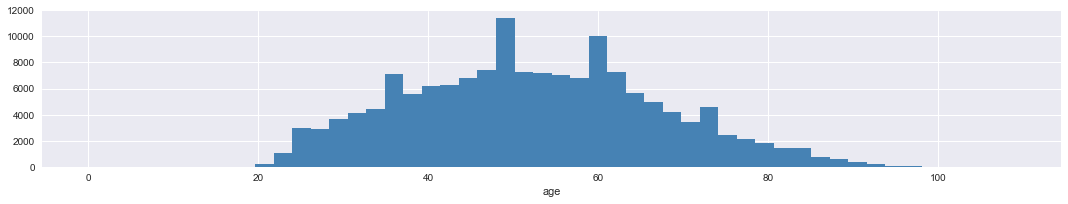

In [104]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "age", color="steelblue", bins=50, lw=0)
plt.show()

In [105]:
credit_df['age'][credit_df['age']<20]

65695    0
Name: age, dtype: int64

In [106]:
credit_df['age'].max()

109

In [107]:
age= []
for val in credit_df['age']:
    if val <20:
        age.append(20)
    else:
        age.append(val)
credit_df['age']=age

In [108]:
age= []
for val in credit_test_df['age']:
    if val <20:
        age.append(20)
    else:
        age.append(val)
credit_test_df['age']=age

### DebtRatio

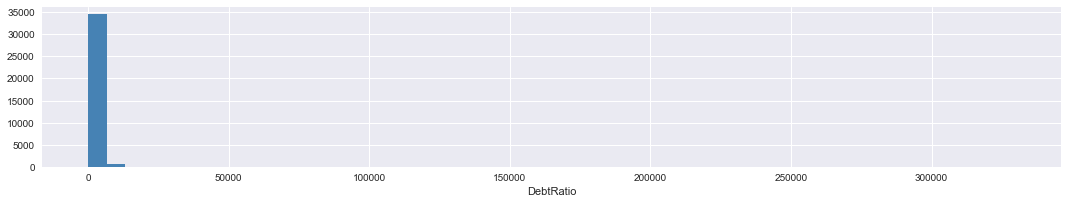

In [109]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["DebtRatio"]>1], margin_titles=True,aspect=5)
g.map(plt.hist, "DebtRatio", color="steelblue", bins=50, lw=0)
plt.show()

In [110]:
num= []
for val in credit_df["DebtRatio"]:
    if val <150000:
        num.append(val)
    else:
        num.append(150000)
credit_df["DebtRatio"]=num

In [111]:
num= []
for val in credit_test_df["DebtRatio"]:
    if val <150000:
        num.append(val)
    else:
        num.append(150000)
credit_test_df["DebtRatio"]=num

### NumberOfOpenCreditLinesAndLoans

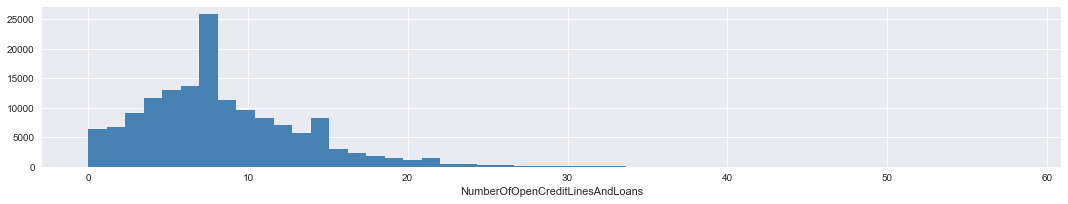

In [112]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfOpenCreditLinesAndLoans", color="steelblue", bins=50, lw=0)
plt.show()

In [113]:
num= []
for val in credit_df["NumberOfOpenCreditLinesAndLoans"]:
    if val <45:
        num.append(val)
    else:
        num.append(45)
credit_df["NumberOfOpenCreditLinesAndLoans"]=num

In [114]:
num= []
for val in credit_test_df["NumberOfOpenCreditLinesAndLoans"]:
    if val <45:
        num.append(val)
    else:
        num.append(45)
credit_test_df["NumberOfOpenCreditLinesAndLoans"]=num

### NumberRealEstateLoansOrLines

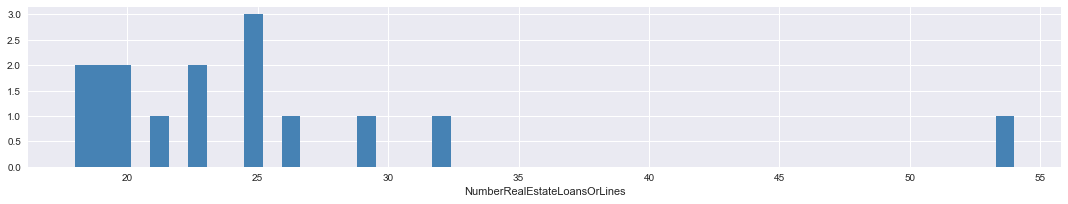

In [115]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df[credit_df["NumberRealEstateLoansOrLines"]>17], margin_titles=True,aspect=5)
g.map(plt.hist, "NumberRealEstateLoansOrLines", color="steelblue", bins=50, lw=0)
plt.show()

### NumberOfDependents

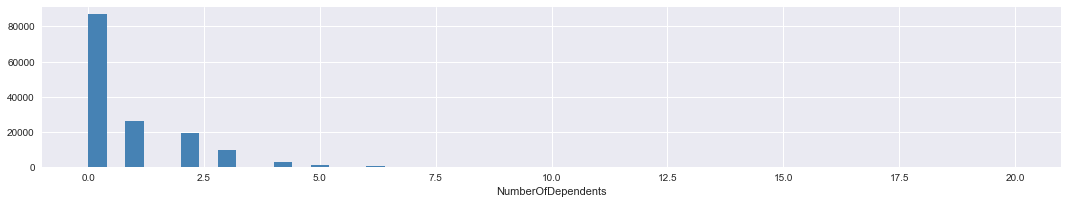

In [116]:
sns.set(style="darkgrid")
g = sns.FacetGrid(credit_df, margin_titles=True,aspect=5)
g.map(plt.hist, "NumberOfDependents", color="steelblue", bins=50, lw=0)
plt.show()

In [117]:
num= []
for val in credit_df["NumberOfDependents"]:
    if val <10:
        num.append(val)
    else:
        num.append(10)
credit_df["NumberOfDependents"]=num

In [118]:
num= []
for val in credit_test_df["NumberOfDependents"]:
    if val <10:
        num.append(val)
    else:
        num.append(10)
credit_test_df["NumberOfDependents"]=num

In [119]:
#Sustituimos los NAs por la media
credit_df["NumberOfDependents"].fillna(credit_df["NumberOfDependents"].median(), inplace=True)
credit_test_df["NumberOfDependents"].fillna(credit_test_df["NumberOfDependents"].median(), inplace=True)

### MonthlyIncome

Construimos un modelo LinearRegression para predecir los valores NAs

In [120]:
train = credit_df[credit_df.MonthlyIncome.isnull() == False]
test = credit_df[credit_df.MonthlyIncome.isnull() == True]

In [121]:
train.shape, test.shape

((120269, 11), (29731, 11))

In [122]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [123]:
#from sklearn.linear_model import LinearRegression
#lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

In [124]:
from sklearn.neighbors import KNeighborsRegressor
knnMod = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)

In [125]:
knnMod.fit(X_train, y_train)
pred = knnMod.predict(X_test)

In [126]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)
        

testFull = credit_df[credit_df.MonthlyIncome.isnull() == True]
testFull['MonthlyIncome'] = predNoZero

C:\Users\Daney\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [127]:
monNew = []
for index in credit_df.index:
    if credit_df.MonthlyIncome[index].is_integer() == True:
        monNew.append(credit_df.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
        
credit_df.MonthlyIncome = monNew

In [128]:
credit_df.MonthlyIncome.describe()

count    1.500000e+05
mean     5.427492e+03
std      1.314716e+04
min      0.000000e+00
25%      1.874000e+03
50%      4.435000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [129]:
#Realizamos el mismo proceso para el conjunto de test
train = credit_test_df[credit_test_df.MonthlyIncome.isnull() == False]
test = credit_test_df[credit_test_df.MonthlyIncome.isnull() == True]

In [130]:
train.shape, test.shape

((81400, 11), (20103, 11))

In [131]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [132]:
#lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)
#pred = lmMod.predict(X_test)

In [133]:
from sklearn.neighbors import KNeighborsRegressor
knnMod = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                             p=2, metric='minkowski', metric_params=None)

knnMod.fit(X_train, y_train)
pred = knnMod.predict(X_test)

In [134]:
predNoZero = []
for val in pred:
    if val >= 0:
        predNoZero.append(val)
    else:
        predNoZero.append(0.)
        

testFull = credit_test_df[credit_test_df.MonthlyIncome.isnull() == True]
testFull['MonthlyIncome'] = predNoZero

C:\Users\Daney\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [135]:
monNew = []
for index in credit_test_df.index:
    if credit_test_df.MonthlyIncome[index].is_integer() == True:
        monNew.append(credit_test_df.MonthlyIncome[index])
    else:
        monNew.append(testFull.MonthlyIncome[index])
        
credit_test_df.MonthlyIncome = monNew

In [136]:
credit_test_df.MonthlyIncome.describe()

count    1.015030e+05
mean     5.586453e+03
std      3.280783e+04
min      0.000000e+00
25%      1.917000e+03
50%      4.434000e+03
75%      7.400000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

## Dividimos en conjuntos de Entrenamiento, validación y test

In [137]:
from sklearn.model_selection import train_test_split
X_train = credit_df.drop("SeriousDlqin2yrs",axis=1)
Y_train = credit_df["SeriousDlqin2yrs"]
X_test  = credit_test_df
#el 15% del conjunto de entrenamiento será para validar
X_train,X_dev,Y_train,Y_dev = train_test_split(X_train, Y_train, test_size=0.30)

In [138]:
# Eliminamos de test la columna a predecir
credit_test_df = credit_test_df.drop('SeriousDlqin2yrs', axis = 1)

### Funciones Auxiliares 

In [139]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def plot_roc(Y, Y_scores):
    fpr, tpr, thresholds = roc_curve(Y, Y_scores, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('Tasa falsos positivos')
    plt.ylabel('Tasa verdaderos positivos')
    plt.title('Curva ROC')
    plt.plot(fpr, tpr)
    plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    plt.show()
    
def eval_model(pipe, X_train, Y_train, X_test, Y_test):
    pipe.fit(X_train, Y_train)
    predicted_test = pipe.predict(X_test)
    scores_test = pipe.predict_proba(X_test)[:,1] #necesitamos la probabilidad para dibujar el area bajo la curva
    predicted_train = pipe.predict(X_train)
    scores_train = pipe.predict_proba(X_train)[:,1]
    print()
    print("Evaluación en el conjunto de entrenamiento:")
    print(classification_report(Y_train, predicted_train))
    print('Roc_auc_score:', roc_auc_score(Y_train, scores_train))
    print()
    print("Evaluación en el conjunto de validación:")
    print(classification_report(Y_test, predicted_test))
    print('Roc_auc_score:', roc_auc_score(Y_test, scores_test))
    plot_roc(Y_test, scores_test)

# Modelos

### 1. Random Forest


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     69867
          1       1.00      0.99      0.99      5133

avg / total       1.00      1.00      1.00     75000

Roc_auc_score: 0.999965480878

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     70107
          1       0.50      0.17      0.26      4893

avg / total       0.92      0.93      0.92     75000

Roc_auc_score: 0.824125012483


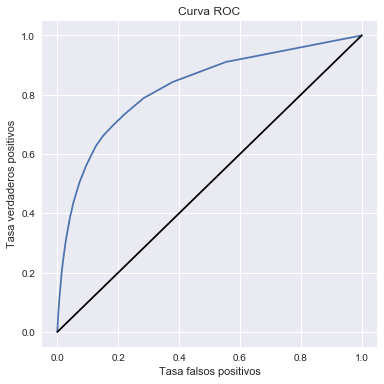

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

rmfc = RandomForestClassifier(n_estimators=50, max_features = 'sqrt')

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for', rmfc)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

### 1.1 Grid Search para el Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('for',RandomForestClassifier())
])

param_range = [30, 40, 50, 60]

param_grid = {'for__n_estimators': param_range}

param_grid = [{'for__n_estimators': param_range,'for__max_features': ['auto']},
              {'for__n_estimators': param_range,'for__max_features': ['sqrt']}]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy')

gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

0.933490196078
{'for__max_features': 'sqrt', 'for__n_estimators': 50}


## 2. Naive Bayes


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95    118984
          1       0.36      0.49      0.41      8516

avg / total       0.92      0.91      0.91    127500

Roc_auc_score: 0.841993363602

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95     20990
          1       0.36      0.50      0.42      1510

avg / total       0.92      0.91      0.91     22500

Roc_auc_score: 0.846979719135


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


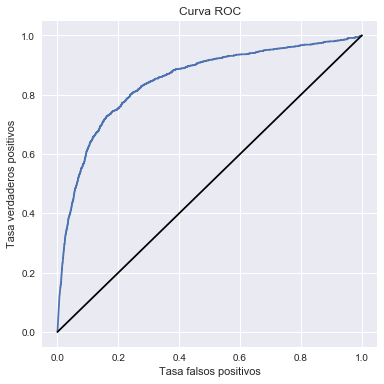

In [78]:
from sklearn.naive_bayes import GaussianNB

gnv = GaussianNB()
pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('nb',gnv)
])

eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 3. kNN


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    118984
          1       0.69      0.31      0.43      8516

avg / total       0.93      0.94      0.93    127500

Roc_auc_score: 0.951378263256

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     20990
          1       0.48      0.20      0.28      1510

avg / total       0.91      0.93      0.92     22500

Roc_auc_score: 0.733955163134


C:\Users\anaalbcru\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


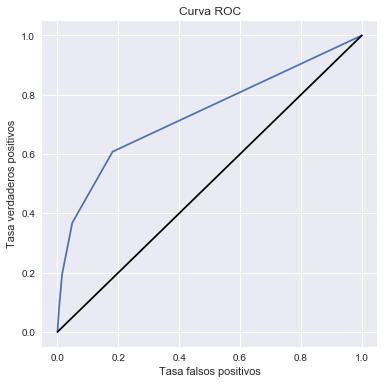

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('knn', knn)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 4. SVC

In [ ]:
from sklearn.svm import SVC

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('svc',SVC(C = 0.5))
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 5. Gradient Boosting Regression


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    119007
          1       0.65      0.20      0.31      8493

avg / total       0.93      0.94      0.92    127500

Roc_auc_score: 0.871989892149

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     20967
          1       0.60      0.19      0.29      1533

avg / total       0.92      0.94      0.92     22500

Roc_auc_score: 0.858884310203


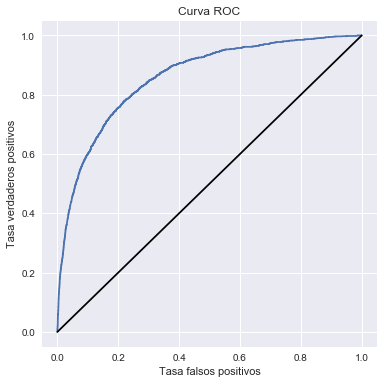

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('gbMod', gbMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

## 6. AdaBoostRegressor


Evaluación en el conjunto de entrenamiento:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    119007
          1       0.56      0.20      0.29      8493

avg / total       0.92      0.94      0.92    127500

Roc_auc_score: 0.86351551316

Evaluación en el conjunto de validación:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     20967
          1       0.53      0.20      0.29      1533

avg / total       0.92      0.93      0.92     22500

Roc_auc_score: 0.853725083037


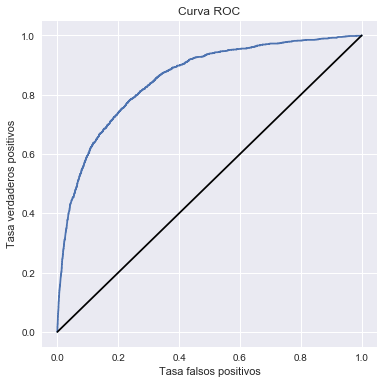

In [64]:
from sklearn.ensemble import AdaBoostClassifier

adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('adaMod', adaMod)
])
eval_model(pipe, X_train, Y_train, X_dev, Y_dev)

# Cross-Validation

In [84]:
def cvDictGen(functions, scr, X_train=X_train, y_train=Y_train, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [85]:
from sklearn.model_selection import cross_val_score
cvDictGen(functions=[rmfc, gnv, knn, gbMod, adaMod], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.3s finished


{'AdaBoostClassifier': [0.85570248916504854, 0.0023373784121283195],
 'GaussianNB': [0.82939851543942122, 0.0069275869532327986],
 'GradientBoostingClassifier': [0.86215365871308569, 0.0019698600191380253],
 'KNeighborsClassifier': [0.57222416779216856, 0.005552659629054736],
 'RandomForestClassifier': [0.83042831862547517, 0.0040793959579247877]}

# Grid Search

## AdaBoost Grid Search

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint

adaHyperParams = {'algorithm' : ['SAMME', 'SAMME.R'],
                 'n_estimators': randint(10, 500)}


adaMod = AdaBoostClassifier()

gridSearchGB = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] algorithm=SAMME.R, n_estimators=109 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=109 -   4.6s
[CV] algorithm=SAMME.R, n_estimators=109 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] .................... algorithm=SAMME.R, n_estimators=109 -   4.6s
[CV] algorithm=SAMME.R, n_estimators=109 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=109 -   5.2s
[CV] algorithm=SAMME.R, n_estimators=479 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=479 -  21.8s
[CV] algorithm=SAMME.R, n_estimators=479 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=479 -  21.7s
[CV] algorithm=SAMME.R, n_estimators=479 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=479 -  22.3s
[CV] algorithm=SAMME.R, n_estimators=433 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=433 -  19.3s
[CV] algorithm=SAMME.R, n_estimators=433 .............................
[CV] .................... algorithm=SAMME.R, n_estimators=433 -  20.9s
[CV] algorithm=SAMME.R, n_estimators=433 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.5min finished


({'algorithm': 'SAMME', 'n_estimators': 323}, 0.8588016111825163)

In [209]:
gridSearchGB.best_estimator_.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=323, random_state=None)

In [213]:
ada_mejorado = AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=323, random_state=None)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('gbMod', ada_mejorado)
])

pipe.fit(X_train, Y_train)
predicted_test = pipe.predict(credit_test_df)
scores_test = pipe.predict_proba(credit_test_df)[:,1]

submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('file3.csv', index = False)

## Gradient Boost Randomized Search

In [62]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint

gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_

# 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 93

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=8, n_estimators=498 ....................
[CV] ........... loss=deviance, max_depth=8, n_estimators=498 - 3.0min
[CV] loss=deviance, max_depth=8, n_estimators=498 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] ........... loss=deviance, max_depth=8, n_estimators=498 - 3.0min
[CV] loss=deviance, max_depth=8, n_estimators=498 ....................
[CV] ........... loss=deviance, max_depth=8, n_estimators=498 - 2.9min
[CV] loss=deviance, max_depth=2, n_estimators=216 ....................
[CV] ........... loss=deviance, max_depth=2, n_estimators=216 -  12.2s
[CV] loss=deviance, max_depth=2, n_estimators=216 ....................
[CV] ........... loss=deviance, max_depth=2, n_estimators=216 -  11.2s
[CV] loss=deviance, max_depth=2, n_estimators=216 ....................
[CV] ........... loss=deviance, max_depth=2, n_estimators=216 -  12.7s
[CV] loss=exponential, max_depth=1, n_estimators=409 .................
[CV] ........ loss=exponential, max_depth=1, n_estimators=409 -  17.9s
[CV] loss=exponential, max_depth=1, n_estimators=409 .................
[CV] ........ loss=exponential, max_depth=1, n_estimators=409 -  13.8s
[CV] loss=exponential, max_depth=1, n_estimators=409 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 37.1min finished


({'loss': 'deviance', 'max_depth': 4, 'n_estimators': 93}, 0.8635047357635641)

In [66]:
bestGbModFitted  = gridSearchGB.best_estimator_.fit(X_train, Y_train)

In [67]:
bestGbModFitted 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=93,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Imbalanced classificator - No mejora

In [131]:
from imblearn.over_sampling import SMOTE

onehot_encoder = OneHotEncoder(sparse=False)
imputer = Imputer()
std_scaler = StandardScaler()

gb_mejorado = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=93,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

X_train2 = imputer.fit_transform(X_train)
X_train2 = std_scaler.fit_transform(X_train2)
X_train2, Y_train2 = SMOTE().fit_sample(X_train2, Y_train)
gb_mejorado.fit(X_train2, Y_train2)

Y_train_predicted = gb_mejorado.predict(X_train2)
Y_train_scores = gb_mejorado.predict_proba(X_train2)[:,1]
print("Evaluation on trainig set")
print(classification_report(Y_train2, Y_train_predicted))

Evaluation on trainig set
             precision    recall  f1-score   support

          0       0.88      0.91      0.90     69941
          1       0.91      0.88      0.89     69941

avg / total       0.89      0.89      0.89    139882



In [135]:
X_test2 = imputer.transform(credit_test_df)
X_test2 = std_scaler.transform(X_test2)
Y_test_predicted = gb_mejorado.predict(X_test2)
Y_test_scores = gb_mejorado.predict_proba(X_test2)[:,1]

In [136]:
submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': Y_test_scores})
submission.to_csv('file2.csv', index = False)

## Probamos con GB

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier

gb_mejorado = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=93,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('select_feat', SelectKBest(f_classif, k=10)),
    ('gbMod', gb_mejorado)
])

pipe.fit(X_train, Y_train)
predicted_test = pipe.predict(credit_test_df)
scores_test = pipe.predict_proba(credit_test_df)[:,1]

submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('file.csv', index = False)

# Tensor Flow

In [87]:
import tensorflow as tf
import pandas as pd
import numpy as np

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) 
dnn_clf.fit(X_train, Y_train, batch_size=50, steps=40000)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F2F2E8B048>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Daney\\AppData\\Local\\Temp\\tmpytxwvtrb'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Daney\AppData\Local\Temp\tmpytxwvtrb\model.ckpt.
INFO:tensorflow:loss = 15.4162, step = 1
INFO:tensorflow:global_step/sec: 296.684
INFO:tensorflow:loss = 16.5983, step = 101 (0.344 sec)

INFO:tensorflow:global_step/sec: 315.229
INFO:tensorflow:loss = 0.234038, step = 7301 (0.317 sec)
INFO:tensorflow:global_step/sec: 318.608
INFO:tensorflow:loss = 0.192466, step = 7401 (0.314 sec)
INFO:tensorflow:global_step/sec: 316.18
INFO:tensorflow:loss = 0.17856, step = 7501 (0.316 sec)
INFO:tensorflow:global_step/sec: 316.055
INFO:tensorflow:loss = 0.138298, step = 7601 (0.316 sec)
INFO:tensorflow:global_step/sec: 315.225
INFO:tensorflow:loss = 0.157963, step = 7701 (0.329 sec)
INFO:tensorflow:global_step/sec: 332.407
INFO:tensorflow:loss = 0.234343, step = 7801 (0.307 sec)
INFO:tensorflow:global_step/sec: 303.867
INFO:tensorflow:loss = 0.152743, step = 7901 (0.313 sec)
INFO:tensorflow:global_step/sec: 327.112
INFO:tensorflow:loss = 0.221068, step = 8001 (0.313 sec)
INFO:tensorflow:global_step/sec: 332.795
INFO:tensorflow:loss = 0.249656, step = 8101 (0.306 sec)
INFO:tensorflow:global_step/sec: 316.297
INFO:tensorflow:loss = 0.187243, step = 8201 (0.302 sec)
INFO:tensorflow:global

INFO:tensorflow:loss = 0.189391, step = 15601 (0.325 sec)
INFO:tensorflow:global_step/sec: 302.841
INFO:tensorflow:loss = 0.327417, step = 15701 (0.323 sec)
INFO:tensorflow:global_step/sec: 331.52
INFO:tensorflow:loss = 0.183758, step = 15801 (0.292 sec)
INFO:tensorflow:global_step/sec: 316.781
INFO:tensorflow:loss = 0.213948, step = 15901 (0.316 sec)
INFO:tensorflow:global_step/sec: 336.491
INFO:tensorflow:loss = 0.156124, step = 16001 (0.315 sec)
INFO:tensorflow:global_step/sec: 316.055
INFO:tensorflow:loss = 0.0915185, step = 16101 (0.299 sec)
INFO:tensorflow:global_step/sec: 332.968
INFO:tensorflow:loss = 0.369906, step = 16201 (0.300 sec)
INFO:tensorflow:global_step/sec: 313.62
INFO:tensorflow:loss = 0.143349, step = 16301 (0.325 sec)
INFO:tensorflow:global_step/sec: 326.871
INFO:tensorflow:loss = 0.0954043, step = 16401 (0.310 sec)
INFO:tensorflow:global_step/sec: 317.353
INFO:tensorflow:loss = 0.223962, step = 16501 (0.314 sec)
INFO:tensorflow:global_step/sec: 333.187
INFO:tenso

INFO:tensorflow:loss = 0.136901, step = 23901 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.885
INFO:tensorflow:loss = 0.182436, step = 24001 (1.259 sec)
INFO:tensorflow:global_step/sec: 82.9335
INFO:tensorflow:loss = 0.136014, step = 24101 (0.304 sec)
INFO:tensorflow:global_step/sec: 316.754
INFO:tensorflow:loss = 0.344009, step = 24201 (0.325 sec)
INFO:tensorflow:global_step/sec: 331.973
INFO:tensorflow:loss = 0.18893, step = 24301 (0.309 sec)
INFO:tensorflow:global_step/sec: 317.173
INFO:tensorflow:loss = 0.078405, step = 24401 (0.298 sec)
INFO:tensorflow:global_step/sec: 283.052
INFO:tensorflow:loss = 0.154086, step = 24501 (0.353 sec)
INFO:tensorflow:global_step/sec: 271.446
INFO:tensorflow:loss = 0.528472, step = 24601 (0.373 sec)
INFO:tensorflow:global_step/sec: 331.677
INFO:tensorflow:loss = 0.253848, step = 24701 (0.297 sec)
INFO:tensorflow:global_step/sec: 287.952
INFO:tensorflow:loss = 0.0486114, step = 24801 (0.367 sec)
INFO:tensorflow:global_step/sec: 317.122
INFO:tenso

INFO:tensorflow:loss = 0.214477, step = 32201 (0.336 sec)
INFO:tensorflow:global_step/sec: 318.632
INFO:tensorflow:loss = 0.293914, step = 32301 (0.314 sec)
INFO:tensorflow:global_step/sec: 330.523
INFO:tensorflow:loss = 0.216218, step = 32401 (0.303 sec)
INFO:tensorflow:global_step/sec: 315.888
INFO:tensorflow:loss = 0.165823, step = 32501 (0.301 sec)
INFO:tensorflow:global_step/sec: 332.864
INFO:tensorflow:loss = 0.217148, step = 32601 (0.317 sec)
INFO:tensorflow:global_step/sec: 316.64
INFO:tensorflow:loss = 0.284184, step = 32701 (0.308 sec)
INFO:tensorflow:global_step/sec: 332.81
INFO:tensorflow:loss = 0.165009, step = 32801 (0.308 sec)
INFO:tensorflow:global_step/sec: 321.297
INFO:tensorflow:loss = 0.22779, step = 32901 (0.307 sec)
INFO:tensorflow:global_step/sec: 333.695
INFO:tensorflow:loss = 0.392706, step = 33001 (0.303 sec)
INFO:tensorflow:global_step/sec: 316.529
INFO:tensorflow:loss = 0.192895, step = 33101 (0.300 sec)
INFO:tensorflow:global_step/sec: 278.873
INFO:tensorfl

SKCompat()

In [101]:
y_pred = dnn_clf.predict(credit_test_df)
scores_test = dnn_clf.predict(credit_test_df)
scores_test['probabilities']

INFO:tensorflow:Restoring parameters from C:\Users\Daney\AppData\Local\Temp\tmpytxwvtrb\model.ckpt-40000
INFO:tensorflow:Restoring parameters from C:\Users\Daney\AppData\Local\Temp\tmpytxwvtrb\model.ckpt-40000


array([[  9.60574985e-01,   3.94250564e-02,   7.59683518e-30, ...,
          2.89424809e-20,   1.13035317e-24,   7.44631179e-32],
       [  9.79162693e-01,   2.08373908e-02,   0.00000000e+00, ...,
          2.36541606e-30,   7.88209479e-38,   0.00000000e+00],
       [  9.81188715e-01,   1.88112892e-02,   1.81918540e-28, ...,
          5.38275958e-20,   3.42506303e-23,   4.32874535e-30],
       ..., 
       [  9.82141852e-01,   1.78581700e-02,   0.00000000e+00, ...,
          7.93689901e-38,   0.00000000e+00,   0.00000000e+00],
       [  9.75657642e-01,   2.43423264e-02,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.49346483e-01,   5.06535172e-02,   7.53632637e-30, ...,
          7.73087524e-20,   8.76759633e-25,   4.12232204e-32]], dtype=float32)

In [102]:
scores_test = scores_test['probabilities'][:,1]

In [103]:
submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('filetf.csv', index = False)

# Neural Network MLP

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 7, 5, 4), random_state=1)

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('select_feat', SelectKBest(f_classif, k=10)),
    ('clf', clf)
])

pipe.fit(X_train, Y_train)
predicted_test = pipe.predict(credit_test_df)
scores_test = pipe.predict_proba(credit_test_df)[:,1]

submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('fileper2.csv', index = False)

## Deep Learning with h20 (Neural Network)

In [ ]:
import h2o
get_ipython().magic(u'matplotlib inline')
#IMPORT ALL THE THINGS

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init(max_mem_size = 2)        
h2o.remove_all()   

In [ ]:
df_H2O = h2o.H2OFrame(credit_df)
train,test,valid = df_H2O.split_frame(ratios=[.8, .1])

In [ ]:
X = train.col_names[1:]
y = train.col_names[0]
dl_model = H2ODeepLearningEstimator(hidden=[50,50,50], epochs=1000, standardize = True, activation = "Tanh")
dl_model.train(X, y, train)

In [ ]:
dl_model

In [ ]:
x_test=test[1:]
scores_test = dl_model.predict(x_test)
scores_test.describe()

In [ ]:
test_H2O = h2o.H2OFrame(X_test)

In [ ]:
scores_test = dl_model.predict(test_H2O)
scores_test.describe()

In [ ]:
scores=scores_test.as_data_frame(use_pandas=True)
scores=scores.as_matrix(columns=scores.columns[0:])
scores=scores[:,0]
scores[ scores < 0] = 0
submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores})
submission.to_csv('dl.csv', index = False)
h2o.cluster().shutdown()

# Decission Tree

In [61]:
from sklearn import tree

dtreec = tree.DecisionTreeClassifier()

pipe = Pipeline([
    ('imp',Imputer()),
    ('std',StandardScaler()),
    ('select_feat', SelectKBest(f_classif, k=10)),
    ('dtreec', dtreec)
])

pipe.fit(X_train, Y_train)
predicted_test = pipe.predict(credit_test_df)
scores_test = pipe.predict_proba(credit_test_df)[:,1]

submission = pd.DataFrame({'Id': credit_test_df.index.values +1, 'Probability': scores_test})
submission.to_csv('filepertree.csv', index = False)